In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
books = pd.read_csv("books_additional.csv")
books.head()

,Semester,Class,Class Number,Section Number,Title,Author(s),Gender,Number Students
0,Spring 2012,Reading & Composition: American Song,English R1A,1,Souls of Black Folk,['W. E. B. Du Bois'],male,16.0
1,Spring 2012,Reading & Composition: American Song,English R1A,1,The American Songbag,['Carl Sandburg'],male,16.0
2,Spring 2012,Reading & Composition: American Song,English R1A,1,American Ballads and Folk SOngs,['Alan Lomax'],male,16.0
3,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,On the Principle of Population,['Thomas Robert Malthus'],male,18.0
4,Spring 2012,Reading & Composition: Apocalypse / Now,English R1A,2,The Road,['Cormac McCarthy'],male,18.0


In [34]:
# Number of gender __ authors per semester (ignoring weight of classes)
genders = books.copy()
genders['Male'] = [1 if g == 'male' else 0 for g in books['Gender']]
genders['Female'] = [1 if g == 'female' else 0 for g in books['Gender']]

drop_cols = ['Class', 'Class Number', 'Section Number', 'Title', 'Author(s)', 'Gender', 'Number Students']
for col in drop_cols:
    del genders[col]

## DROP ROWS IF IS SUMMER. FEEL FREE TO COMMENT OUT.
genders = genders[genders["Semester"].str.contains("Summer") == False]
    
genders = genders.groupby('Semester', sort=False).sum()
genders["Proportion"] = genders["Male"] / (genders["Male"] + genders["Female"])



genders

,Male,Female,Proportion
Semester,,,
Spring 2012,260,94,0.734463
Fall 2012,239,71,0.770968
Spring 2013,148,61,0.708134
Fall 2013,240,73,0.766773
Spring 2014,243,82,0.747692
Fall 2014,250,96,0.722543
Spring 2015,223,84,0.726384
Fall 2015,196,86,0.695035
Spring 2016,217,85,0.718543


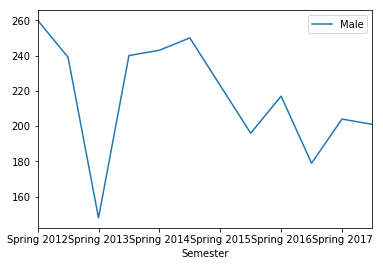

,Male
Semester,
Spring 2012,260
Fall 2012,239
Spring 2013,148
Fall 2013,240
Spring 2014,243
Fall 2014,250
Spring 2015,223
Fall 2015,196
Spring 2016,217


In [38]:
# MALE
male = genders.copy()
del male["Female"]
del male["Proportion"]

plt.figure()
male.plot()
plt.show()

# FEMALE
female = genders.copy()
del female["Male"]
del female["Proportion"]

plt.figure()
male.plot()
plt.show()